In [113]:
import pandas as pd 
import numpy as np
import os 
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

while 'src' not in os.listdir():
    os.chdir('..')

# Set the style of the plots
markers = ['o', 's', 'D', 'v', 'p', 'P', 'X', 'h', 'H', 'd']
colors_discrete = sns.color_palette('tab10')
colors_continuous = sns.color_palette('viridis')
linestyles = ['-', '--', '-.', ':']

# Do not hide any columns
pd.set_option('display.max_columns', None)
sns.set_theme(style='whitegrid', font_scale=1)

os.getcwd()

'/home/ignacy/research/betaRCE'

In [114]:
results_path = 'results/corr'
images_dir = f'{results_path}/images'

os.makedirs(images_dir, exist_ok=True)

In [115]:
def process_results(results_path: str, ext: str = 'feather'):
    results_list = []

    # Read all the results from results/ directory
    for dirname in tqdm(os.listdir(results_path), desc='Reading results'):
        if 'images' not in dirname:
            if not os.path.isdir(f'{results_path}/{dirname}') or 'results' not in os.listdir(f'{results_path}/{dirname}'):
                continue
            for file in os.listdir(f'{results_path}/{dirname}/results'):
                if file.endswith(f'.{ext}'):
                    
                    
                    if ext == 'csv':
                        df = pd.read_csv(f'{results_path}/{dirname}/results/{file}')
                    elif ext == 'feather':
                        df = pd.read_feather(f'{results_path}/{dirname}/results/{file}')
                    else:
                        raise ValueError('Unknown extension')
                    
                    # Custom parsing kinda weird
                    if 'dt' in dirname:
                        df['base_model'] = 'DecisionTree'
                    else:
                        df['base_model'] = 'NeuralNetwork'
                        
                    if 'dice' in dirname:
                        df['base_cf_method'] = 'Dice'
                    elif 'rbr' in dirname:
                        df['base_cf_method'] = 'RBR'
                    elif 'roar' in dirname:
                        df['base_cf_method'] = 'ROAR'
                    elif 'face' in dirname:
                        df['base_cf_method'] = 'FACE'
                    else:
                        df['base_cf_method'] = 'GrowingSpheres'
                        
                    # Temporary fix for the experiment type
                    # ----------------------------
                    # exp_types = list(filter(lambda x: 'seed' not in x.lower(), df['experiment_type'].unique()))
                    # df = df[df['experiment_type'].isin(exp_types)]
                    # ----------------------------
                        
                    results_list.append(df)
    
    # Concatenate all the results
    raw_df: pd.DataFrame = pd.concat(results_list, ignore_index=True)
    return raw_df

In [116]:
raw_df = process_results(results_path)

Reading results: 100%|██████████| 3/3 [00:03<00:00,  1.08s/it]


In [117]:
raw_df = raw_df.dropna()
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36000 entries, 0 to 40400
Data columns (total 50 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   base_cf_method                                  36000 non-null  object 
 1   model_type_to_use                               36000 non-null  object 
 2   experiment_type                                 36000 non-null  object 
 3   dataset_name                                    36000 non-null  object 
 4   k_mlps_in_B                                     36000 non-null  int64  
 5   fold_i                                          36000 non-null  int64  
 6   experiment_generalization_type                  36000 non-null  object 
 7   beta_confidence                                 36000 non-null  float64
 8   delta_robustness                                36000 non-null  float64
 9   model2_name                            

In [118]:
base = [
    'base_counterfactual_proximityL1',
    'base_counterfactual_proximityL2',
    'base_counterfactual_plausibility',
    # 'base_counterfactual_discriminative_power'
]

robust = [
    'robust_counterfactual_proximityL1',
    'robust_counterfactual_proximityL2',
    'robust_counterfactual_plausibility',
    # 'robust_counterfactual_discriminative_power'
]

metrics = [
    'proximityL1',
    'proximityL2',
    'plausibility',
    # 'discriminative_power'
]

reference = 'robust_counterfactual_L1_distance_from_base_cf'

In [119]:
new_df = raw_df.copy()[base + robust + [reference]]
# new_df['base_counterfactual_discriminative_power'] = 1 - new_df['base_counterfactual_discriminative_power']
# new_df['robust_counterfactual_discriminative_power'] = 1 - new_df['robust_counterfactual_discriminative_power']

# Calculate the percentage of change
for met in metrics:
    new_df['perc_change_' + met] = (new_df['base_counterfactual_' + met] - new_df['robust_counterfactual_' + met]) / new_df['base_counterfactual_' + met]
    
new_df['reference'] = raw_df[reference]
new_df = new_df.dropna()

new_df

,base_counterfactual_proximityL1,base_counterfactual_proximityL2,base_counterfactual_plausibility,robust_counterfactual_proximityL1,robust_counterfactual_proximityL2,robust_counterfactual_plausibility,robust_counterfactual_L1_distance_from_base_cf,perc_change_proximityL1,perc_change_proximityL2,perc_change_plausibility,reference
0,1.044152,0.417323,0.269229,1.044152,0.417323,0.269229,0.0,0.0,0.0,0.0,0.0
1,1.044152,0.417323,0.269229,1.044152,0.417323,0.269229,0.0,0.0,0.0,0.0,0.0
2,1.044152,0.417323,0.269229,1.044152,0.417323,0.269229,0.0,0.0,0.0,0.0,0.0
3,1.044152,0.417323,0.269229,1.044152,0.417323,0.269229,0.0,0.0,0.0,0.0,0.0
4,1.044152,0.417323,0.269229,1.044152,0.417323,0.269229,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
40396,0.772353,0.335460,0.476549,1.325894,0.628725,0.527263,0.90169,-0.716693,-0.874216,-0.10642,0.90169
40397,0.772353,0.335460,0.476549,1.280584,0.606291,0.498386,0.796966,-0.65803,-0.807339,-0.045824,0.796966
40398,0.772353,0.335460,0.476549,1.439481,0.685601,0.62313,0.914266,-0.86376,-1.043761,-0.307587,0.914266
40399,0.772353,0.335460,0.476549,1.358954,0.593061,0.457518,0.839915,-0.759498,-0.7679,0.039935,0.839915


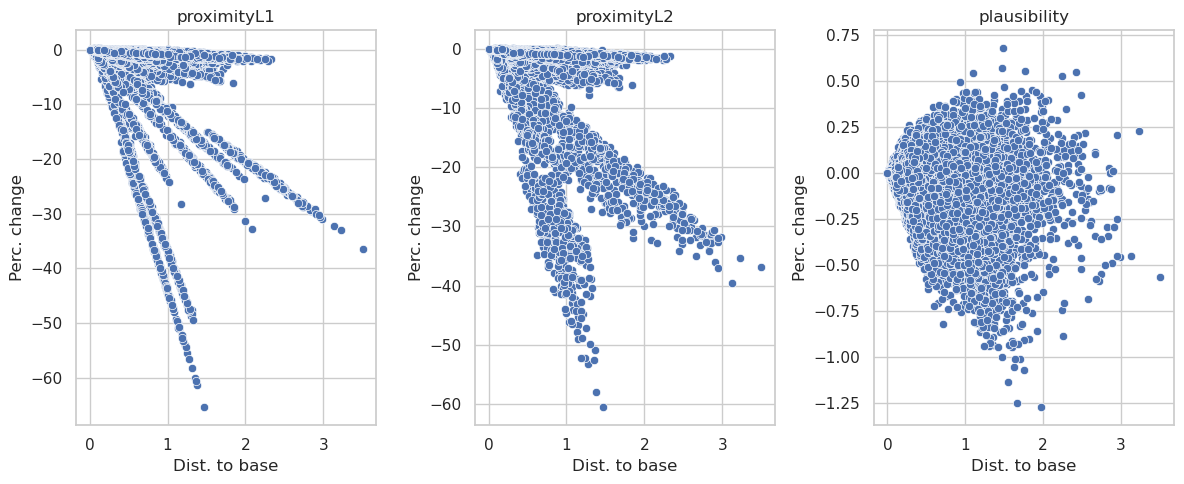

In [120]:
# Plot scatter perc_change vs reference on 4 subplots, each for a different metric
fig, axes = plt.subplots(1, 3, figsize=(12, 5))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    ax = axes[i]
    sns.scatterplot(data=new_df, y=f'perc_change_{metric}', x='reference', ax=ax)
    ax.set_title(metric)
    ax.set_xlabel('Dist. to base')
    ax.set_ylabel('Perc. change')
    

    
plt.tight_layout()
plt.savefig(f'{images_dir}/percent_change_vs_reference.png')
plt.show()

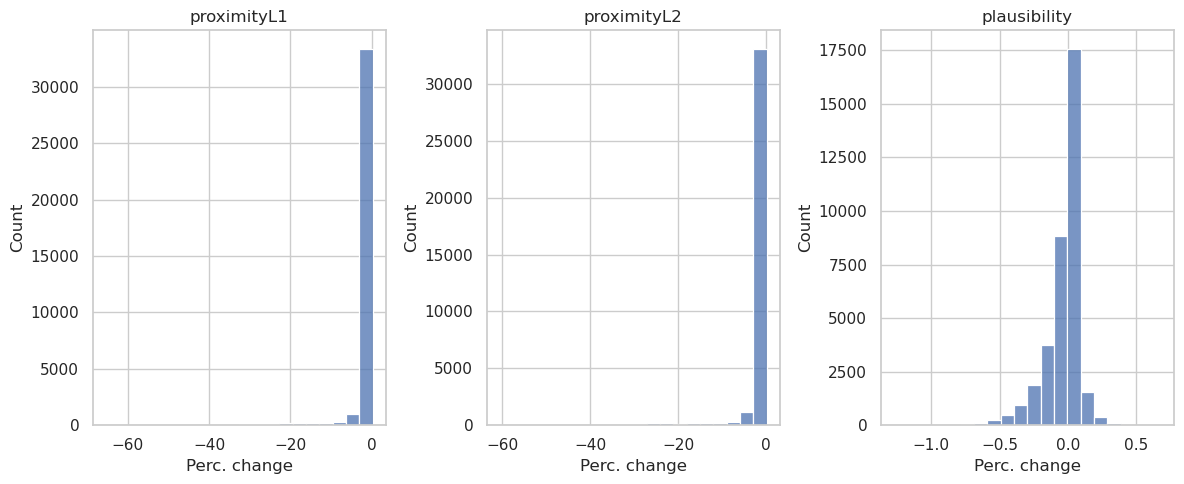

In [121]:
# Do histograms for each metric
fig, axes = plt.subplots(1, 3, figsize=(12, 5))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    ax = axes[i]
    sns.histplot(data=new_df, x=f'perc_change_{metric}', ax=ax, bins=20)
    ax.set_title(metric)
    ax.set_xlabel('Perc. change')
    ax.set_ylabel('Count')
    
plt.tight_layout()
plt.savefig(f'{images_dir}/percent_change_histograms.png')
plt.show()

In [128]:
# corrs = new_df[[f'perc_change_{met}' for met in metrics] + ['reference']] \
#     .replace(0, 0.0001) \
#     .dropna() \
#     .corr()
    
# Calculate rho and p-values
from scipy.stats import pearsonr, spearmanr

corrs = {}
for met in metrics:
    rho, p = pearsonr(new_df[f'perc_change_{met}'], new_df['reference'])
    rho_s, p_s = spearmanr(new_df[f'perc_change_{met}'], new_df['reference'])
    corrs[met + '_pears'] = (rho, p)
    corrs[met + '_spear'] = (rho_s, p_s)

avg_pearson = np.mean([rho for k, (rho, _) in corrs.items() if 'pears' in k])
avg_spearman = np.mean([rho for k, (rho, _) in corrs.items() if 'spear' in k])

corrs['avg_pearson'] = avg_pearson
corrs['avg_spearman'] = avg_spearman

corrs
    

{'proximityL1_pears': (-0.48091378690767045, 0.0),
 'proximityL1_spear': (-0.8522593078364115, 0.0),
 'proximityL2_pears': (-0.5162890764360528, 0.0),
 'proximityL2_spear': (-0.8633157290464186, 0.0),
 'plausibility_pears': (-0.36195307532209264, 0.0),
 'plausibility_spear': (-0.3331617000651668, 0.0),
 'avg_pearson': -0.45305197955527204,
 'avg_spearman': -0.6829122456493323}

{'proximityL1': (-0.48091378690767045, 0.0), 'proximityL2': (-0.5162890764360528, 0.0), 'plausibility': (-0.36195307532209264, 0.0)}


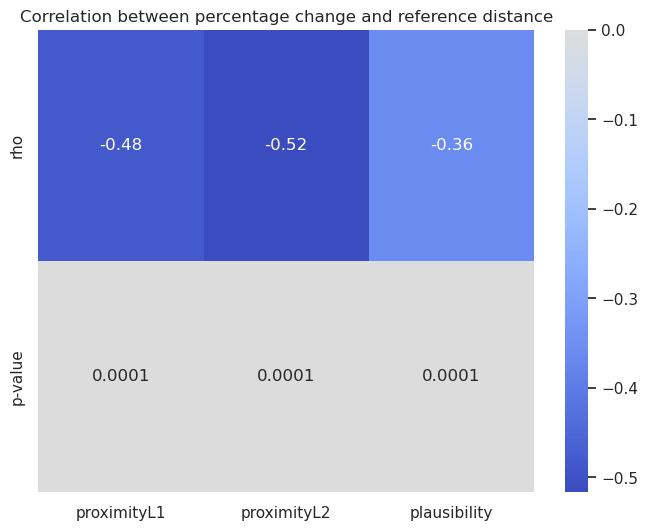

In [123]:
# Calculate the correlation between the percentage change and the reference distance
print(corrs)
corrs = pd.DataFrame(corrs, index=['rho', 'p-value']).replace(0, 0.0001)
# rename reference to distance
corrs = corrs.rename(index={'reference': 'dist. to base'}, columns={'reference': 'dist. to base'})

# Plot seaborn heatmap with annotations
plt.figure(figsize=(8, 6))
sns.heatmap(corrs, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between percentage change and reference distance')
plt.savefig(f'{images_dir}/correlation_heatmap.png')
plt.show()

In [124]:
# Calculate correlation between the percentage change in plausibility and proximity L1 and the reference distance as one
# This is done to see if the reference distance is a good indicator of the percentage change in the metrics
# Aggregate this as one metric
